In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('C:/Users/mnjnt/Downloads/breastcancer1.csv')

In [3]:
#dealing missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#Replacing missing values with mean
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['texture_mean'] = df['texture_mean'].fillna(df['texture_mean'].mean())



In [5]:
#after treating missing value
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#defining X and y variable
x=np.array(df.iloc[0:,2:4])

In [7]:
x

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [10]:
y = np.array(df['diagnosis'].map({'M':1,'B':0}))

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [12]:
x.shape

(569, 2)

In [13]:
y.shape

(569,)

In [14]:
# using training and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8947368421052632

<Axes: >

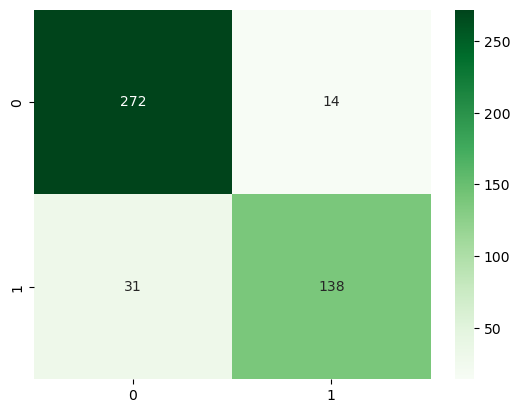

In [16]:
#Prediction on training data
y_train_predict=knn.predict(x_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
#confusion matrix
confusionmatrix=confusion_matrix(y_train,y_train_predict)
classname=['0','1']
sn.heatmap(confusionmatrix,annot=True,yticklabels=classname,xticklabels=classname,fmt='g',cmap='Greens')

In [17]:
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(y_train,y_train_predict))
print('Precision Score: %.3f' % precision_score(y_train,y_train_predict))
print('Recall Score: %.3f' % recall_score(y_train,y_train_predict))
print('F1 Score: %.3f' % f1_score(y_train,y_train_predict))


Accuracy: 0.9010989010989011
Precision Score: 0.908
Recall Score: 0.817
F1 Score: 0.860


<Axes: >

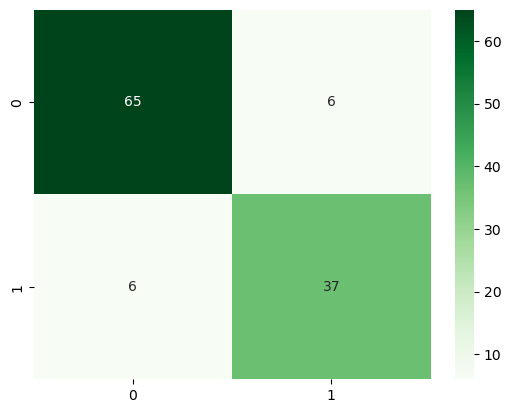

In [18]:
#Prediction on test data
y_test_predict=knn.predict(x_test)
#confusion matrix
confusionmatrix=confusion_matrix(y_test,y_test_predict)
sn.heatmap(confusionmatrix,annot=True,xticklabels=classname,yticklabels=classname,fmt='g',cmap='Greens')

In [19]:
print("Accuracy:%.3f" %accuracy_score(y_test,y_test_predict))
print("Precision score:%.3f" %precision_score(y_test,y_test_predict))
print("recall score:%.3f" %recall_score(y_test,y_test_predict))
print("f1 score: %.3f" %f1_score(y_test,y_test_predict))

Accuracy:0.895
Precision score:0.860
recall score:0.860
f1 score: 0.860
